# Complex Networks

Student: Hossein Ebrahimpour

ID: 98723249

Homework 1a - **Question 5**

In [36]:
# download file and put the 'stackoverflow-Java.txt' somewhere
data_url = "stackoverflow-Java.txt"

graphRaw = open(data_url).readlines()
def extractData(rawString):
    tokens = rawString.replace("\n", "").split("\t")
    return (int(tokens[0]), int(tokens[1]))

graphCleansedItems = list(map(extractData, graphRaw))

In [37]:
import networkx as nx

g = nx.Graph().to_directed()

g.add_edges_from(graphCleansedItems)

In [38]:
import matplotlib.pyplot as plt
import collections

degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)

def drawByDegreeItems(degreeItems, title):
    deg, cnt = zip(*degreeItems)

    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=1, color='b')

    plt.title(title)
    plt.ylabel("Count")
    plt.xlabel("Degree")
    ax.set_xticks(deg)
    ax.set_yticks(cnt)
    ax.set_xticklabels(deg)
    plt.show()


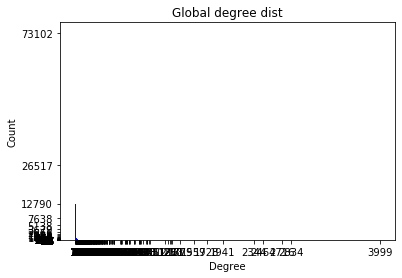

In [5]:
degree_items = degreeCount.items()
drawByDegreeItems(degree_items, "Global degree dist")

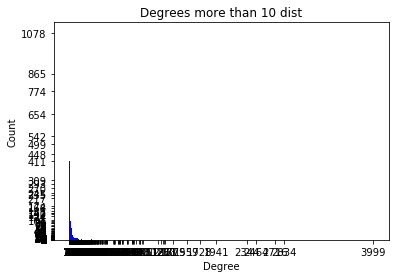

In [6]:
degrees_more_than_ten =  list(filter(lambda x: x[0] > 10, degree_items))
drawByDegreeItems(degrees_more_than_ten, "Degrees more than 10 dist")

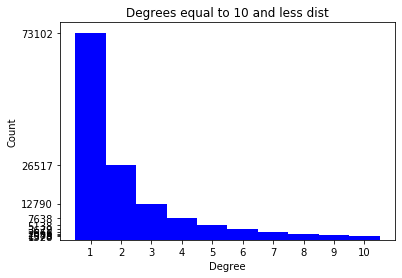

In [7]:
degrees_ten_and_less =  list(filter(lambda x: x[0] < 11, degree_items))
drawByDegreeItems(degrees_ten_and_less, "Degrees equal to 10 and less dist")

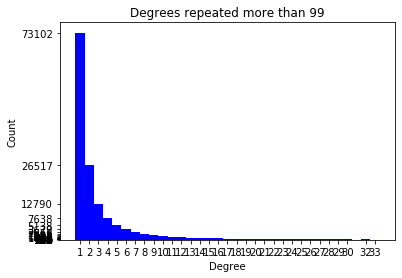

In [8]:
degrees_repeated_more_than_99 =  list(filter(lambda x: x[1] > 99, degree_items))
drawByDegreeItems(degrees_repeated_more_than_99, "Degrees repeated more than 99")

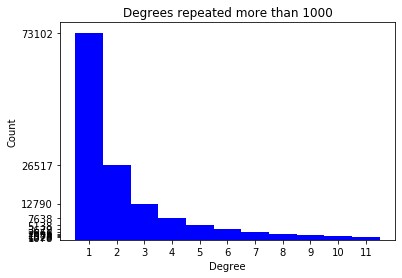

In [9]:
degrees_repeated_more_than_1000 =  list(filter(lambda x: x[1] > 1000, degree_items))
drawByDegreeItems(degrees_repeated_more_than_1000, "Degrees repeated more than 1000")

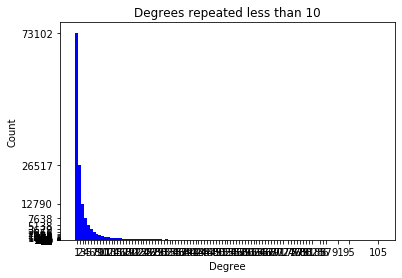

In [10]:
degrees_repeated_less_than_10 =  list(filter(lambda x: x[1] > 10, degree_items))
drawByDegreeItems(degrees_repeated_less_than_10, "Degrees repeated less than 10")

In [39]:
import numpy as np

print("Average of degree sequesnce")
np.mean(degree_sequence)

Average of degree sequesnce


4.5427509293680295

In [40]:
wccs = nx.weakly_connected_component_subgraphs(g)
sorted_wcc = sorted(wccs, key=len, reverse=True)
print("Number of weakly connected components:")
print(len(sorted_wcc))

greatest_wcc = sorted_wcc[0]

print("Number of nodes in greatest weakly connected component:")
print(len(greatest_wcc))

print("Number of edges in greatest weakly connected component:")
print(len(greatest_wcc.edges()))

Number of weakly connected components:
10143
Number of nodes in greatest weakly connected component:
131188
Number of edges in greatest weakly connected component:
322486


In [41]:
print("Five highest page rank nodes")
pageRanks = nx.pagerank(g)
sorted(pageRanks.items(), key= lambda x: x[1], reverse=True)[0:5]

Five highest page rank nodes


[(992484, 0.007854821724484899),
 (22656, 0.007686202716758486),
 (139985, 0.006191751123425335),
 (157882, 0.005169214281328872),
 (57695, 0.00427420799523042)]

In [14]:
print("Five highest page rank nodes of greatest weakly connected component")
sorted(nx.pagerank(greatest_wcc).items(), key= lambda x: x[1], reverse=True)[0:5]

Five highest page rank nodes of greatest weakly connected component


[(992484, 0.008686307274693987),
 (22656, 0.008471337512929685),
 (139985, 0.006839120752517664),
 (157882, 0.0056876820834398266),
 (57695, 0.00469882813327606)]

In [42]:
print("Top 10 Programmers with the most accepted answers [format: (id, count)]:")
acceptedCounter = collections.Counter(map(lambda x: x[1],graphCleansedItems)).items()
sorted(acceptedCounter, key=lambda x: x[1], reverse=True)[0:10]

Top 10 Programmers with the most accepted answers [format: (id, count)]:


[(22656, 4709),
 (157882, 4110),
 (571407, 3089),
 (57695, 2786),
 (139985, 2613),
 (992484, 2305),
 (522444, 1914),
 (203907, 1856),
 (131872, 1632),
 (230513, 1468)]

In [43]:
print("Top 10 Programmers with the most acceptings [format: (id, count)]:")
acceptingCounter = collections.Counter(map(lambda x: x[0],graphCleansedItems)).items()
sorted(acceptingCounter, key=lambda x: x[1], reverse=True)[0:10]

Top 10 Programmers with the most acceptings [format: (id, count)]:


[(892029, 590),
 (1194415, 498),
 (44330, 259),
 (454049, 256),
 (187141, 251),
 (359862, 239),
 (785349, 235),
 (470184, 216),
 (11236, 213),
 (108869, 210)]

In [53]:
accepted_dict = dict(acceptedCounter)
accepting_dict = dict(acceptingCounter)

In [65]:
# Formula:
# let a = accepted answers
# let b = asked in community
# let p = page rank
# pro user -> (2a + b) * (1 + (100p))
print("Pro Java users [(id, pagerank, answer, ask, score)]:")
programmer_scores = list()
for programmer in g.nodes():
    pagerank = pageRanks.get(programmer)
    try:
        answer = accepted_dict.get(programmer)
        ask = accepting_dict.get(programmer) if programmer in accepting_dict.keys() else 0
        programmer_scores.append((programmer, pagerank, answer, ask, (2 * answer + ask) * (1 + (pagerank * 100))))
    except:
        pass
    
list(sorted(programmer_scores, key=lambda x: x[4], reverse=True))[0:10]

Pro Java users [(id, pagerank, answer, ask, score)]:


[(22656, 0.007686202716758486, 4709, 0, 16656.865718643145),
 (157882, 0.005169214281328872, 4110, 6, 12478.195667821132),
 (571407, 0.004156388371880533, 3089, 2, 8748.648013822169),
 (139985, 0.006191751123425335, 2613, 6, 8471.524187776135),
 (992484, 0.007854821724484899, 2305, 1, 8232.858297159986),
 (57695, 0.00427420799523042, 2786, 16, 7976.4274277347595),
 (203907, 0.002371465338427535, 1856, 77, 4687.5482167301925),
 (522444, 0.002018793476219092, 1914, 6, 4608.0054187824),
 (131872, 0.0020968417652245204, 1632, 0, 3948.409152169283),
 (230513, 0.0024448083785521698, 1468, 5, 3660.0181441321934)]